## Alur untuk proses cleaning task
Drop duplicated ->  Handling missing data type -> Handling Null Column 

##### Note : untuk handling mistake datatypes dan null value, nama kolom pada dataset harus sesuai dengan dibawah
Urutan Kolom Data : date, akun, likes, komen, post_type, link

#### Handling missing data type

Solusi : <br> digunakan untuk mengatasi kasus seperti <br> ( - ) kolom "date", object => datetime (ada value selain tanggal pada kolom) <br> ( - ) kolom "akun", (ada value int pada kolom) <br> ( - ) kolom "likes" dan "komen" , object => float (ada string pada kolom) <br> ( - ) kolom "post_type", (ada value int pada kolom)

#### Handling Null Column

Solusi : <br> ( - ) Kolom "Date" diisi dengan forward fill & backward fill <br> ( - ) likes diisi dengan -100 <br> ( - ) komen diisi dengan -100

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

contoh dataset

In [221]:
date_list = ['a', '2020-01-02',"a",'2019-11-14','2020-10-30','a']
# c = ['XZ',1,3,'PT','LM',4]
a = ['detik',2,np.NaN,'detik','detik',999999]
likes = [100,'XZ',102,np.NaN,104,105]
komen = [50,51,52,np.NaN,54,'AA']
tipe = ['single','video','side','single',2,'side']
url = ['a.com','b.com','c.com','d.com','e.com','f.com']

tes = pd.DataFrame({'Date':date_list, 'akun':a, 'likes':likes, "komen":komen, "post":tipe, "url":url})
tes

Date    akun likes komen    post    url
0           a   detik   100    50  single  a.com
1  2020-01-02       2    XZ    51   video  b.com
2           a     NaN   102    52    side  c.com
3  2019-11-14   detik   NaN   NaN  single  d.com
4  2020-10-30   detik   104    54       2  e.com
5           a  999999   105    AA    side  f.com

In [222]:
# fungsi buat drop duplicate
def duplicate(df):
    df.drop_duplicates(inplace=True)

In [223]:
# fungsi untuk drop null
def dropNull(df):
    df.dropna(inplace=True)
    df.reset_index(inplace=True, drop=True)

In [224]:
# fungsi untuk rename kolom
# date, akun, likes, komen, post_type, link
def renameCol(df):
    df.columns = ['date','akun','likes','komen','post_type','link']

renameCol(tes)
tes

date    akun likes komen post_type   link
0           a   detik   100    50    single  a.com
1  2020-01-02       2    XZ    51     video  b.com
2           a     NaN   102    52      side  c.com
3  2019-11-14   detik   NaN   NaN    single  d.com
4  2020-10-30   detik   104    54         2  e.com
5           a  999999   105    AA      side  f.com

In [225]:
# fungsi untuk handling mistaken data type
# dengan catatan nama kolom harus sama yaitu, "date" - "akun" - "likes" - "komen" - "post_type" - "link"

def handleMistake(df):
    # kolom date
    df['date'] = pd.to_datetime(df['date'],  errors='coerce')
    # kolom akun
    df['akun'][df['akun'].astype(str).str.isdigit()] = np.NaN
    # kolom likes
    df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
    # kolom komen
    df['komen'] = pd.to_numeric(df['komen'], errors='coerce')
    # kolom post_type
    df['post_type'][df['post_type'].astype(str).str.isdigit()] = np.NaN
    # kolom link

In [226]:
handleMistake(tes)

In [227]:
tes

date   akun  likes  komen post_type   link
0        NaT  detik  100.0   50.0    single  a.com
1 2020-01-02    NaN    NaN   51.0     video  b.com
2        NaT    NaN  102.0   52.0      side  c.com
3 2019-11-14  detik    NaN    NaN    single  d.com
4 2020-10-30  detik  104.0   54.0       NaN  e.com
5        NaT    NaN  105.0    NaN      side  f.com

In [228]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3 non-null      datetime64[ns]
 1   akun       3 non-null      object        
 2   likes      4 non-null      float64       
 3   komen      4 non-null      float64       
 4   post_type  5 non-null      object        
 5   link       6 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 416.0+ bytes


In [229]:
# fungsi untuk handling kasus null
# dengan catatan nama kolom harus sama yaitu, "date" - "akun" - "likes" - "komen" - "post_type" - "link"
def handleNull(df):
    # kolom date
    df['date'] = df['date'].fillna(method='ffill').fillna(method='bfill')
    # kolom akun
    df['komen'].fillna("undefined", inplace=True)  
    # kolom likes
    df['likes'].fillna("-100", inplace=True)
    # kolom komen
    df['komen'].fillna("-100", inplace=True)  
    # kolom post_type
    df['komen'].fillna("undefined", inplace=True)  

In [230]:
tes

date   akun  likes  komen post_type   link
0        NaT  detik  100.0   50.0    single  a.com
1 2020-01-02    NaN    NaN   51.0     video  b.com
2        NaT    NaN  102.0   52.0      side  c.com
3 2019-11-14  detik    NaN    NaN    single  d.com
4 2020-10-30  detik  104.0   54.0       NaN  e.com
5        NaT    NaN  105.0    NaN      side  f.com

In [231]:
handleNull(tes)
tes

date   akun  likes komen post_type   link
0 2020-01-02  detik  100.0  50.0    single  a.com
1 2020-01-02    NaN   -100  51.0     video  b.com
2 2020-01-02    NaN  102.0  52.0      side  c.com
3 2019-11-14  detik   -100  -100    single  d.com
4 2020-10-30  detik  104.0  54.0       NaN  e.com
5 2020-10-30    NaN  105.0  -100      side  f.com

coretan

In [175]:
df = pd.read_csv('nama_file.csv')
# df.head()
df.head(10)

date       user_id  total_likes  total_comments  \
0  2022-05-31 06:17:09  lingkaran.co          268               5   
1  2022-05-26 04:21:54  lingkaran.co          170               2   
2  2022-05-12 09:29:43  lingkaran.co          998              12   
3  2022-04-07 10:55:38  lingkaran.co          256               5   
4  2022-03-20 09:45:12  lingkaran.co         1377              34   
5  2022-03-09 06:48:45  lingkaran.co          311               3   
6  2022-03-09 06:48:45  lingkaran.co          311               3   
7  2022-03-03 03:46:49  lingkaran.co          198               5   
8  2022-03-02 06:49:36  lingkaran.co          887               5   
9  2022-03-01 09:23:54  lingkaran.co          223               0   

      post_type                                            caption  
0  GraphSidecar  Pilih mau yang CTA atau CTV bisa disesuaikan s...  
1  GraphSidecar  Nge-blog tuh emang harus diobok-obok terus bia...  
2  GraphSidecar  Setiap socmed specialist (dan role serupa) ke ...  
3  GraphSidecar  Niche\r\n\ ˈnich  also ˈnēsh or ˈnish \\r\n\r\...  
4        single  Ga ada yang nanya sih, tapi kira-kira kalau ad...  
5  GraphSidecar  Makanya kalau temannya bikin usaha jangan mint...  
6  GraphSidecar  Makanya kalau temannya bikin usaha jangan mint...  
7  GraphSidecar  Kalau Steve Jobs sih udah pasti hafal materi l...  
8  GraphSidecar  Intinya sih berani beda kalau daftar kerja, bi...  
9  GraphSidecar  Asal kata passion, dalam bahasa Yunani (pathos...

In [176]:
# jika ingin di urut berdasarkan tanggal
# df = df.sort_values(by="date")
# df = df.reset_index()
# df.head(10)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            221 non-null    object
 1   user_id         221 non-null    object
 2   total_likes     221 non-null    int64 
 3   total_comments  221 non-null    int64 
 4   post_type       221 non-null    object
 5   caption         221 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.5+ KB


In [178]:
# jika ingin di split antara tanggal dan jam
# df[['date', 'jam']] = df['date'].str.split(' ', 1, expand=True)

In [179]:
# ubah tipe objek menjadi tipe datetime di kolom 'date'
df['date'] = pd.to_datetime(df['date'])

In [180]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            221 non-null    datetime64[ns]
 1   user_id         221 non-null    object        
 2   total_likes     221 non-null    int64         
 3   total_comments  221 non-null    int64         
 4   post_type       221 non-null    object        
 5   caption         221 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.5+ KB


## duplicated

ada 69 baris dari 221 baris (31%) data yang sama / duplicated

In [183]:
duplicate = list(df.duplicated())
print("DataTraining Duplikasi :", duplicate.count(True))

DataTraining Duplikasi : 0


In [184]:
# dup = df[df.duplicated()]
# dup.sample(5)

In [185]:
print("persentase duplicate value", len(df[df.duplicated()])*100.0/len(df))

persentase duplicate value 0.0


In [186]:
df.drop_duplicates(inplace=True)

In [187]:
duplicate = list(df.duplicated())
print("DataTraining Duplikasi :", duplicate.count(True))

DataTraining Duplikasi : 0


## null value

<AxesSubplot:>

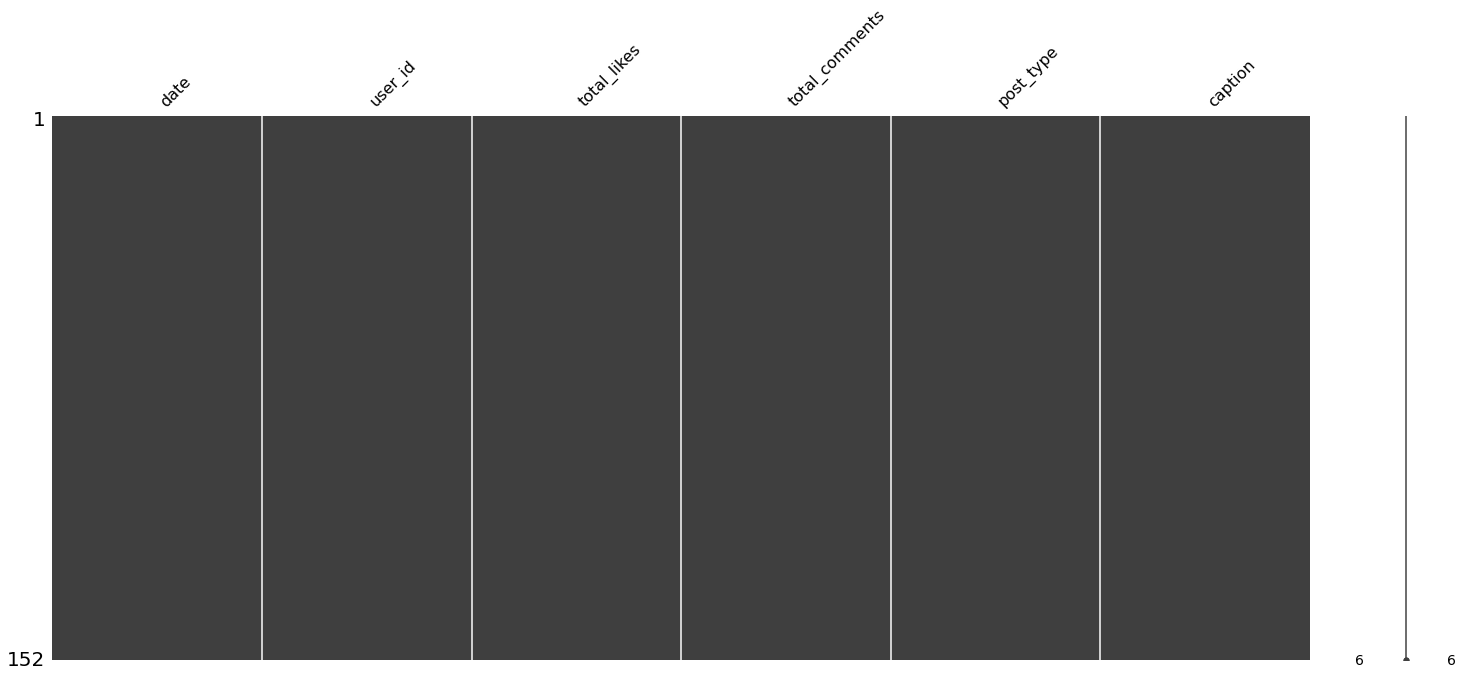

In [188]:
import missingno as msno

msno.matrix(df)

## validity

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            152 non-null    datetime64[ns]
 1   user_id         152 non-null    object        
 2   total_likes     152 non-null    int64         
 3   total_comments  152 non-null    int64         
 4   post_type       152 non-null    object        
 5   caption         152 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.2+ KB


In [192]:
df.describe()

total_likes  total_comments
count   152.000000      152.000000
mean    414.782895        4.848684
std     517.641070        9.678104
min      40.000000        0.000000
25%     133.000000        0.000000
50%     257.500000        1.000000
75%     514.500000        5.000000
max    4246.000000       49.000000

In [193]:
cols = ['date', 'user_id', 'post_type','caption']

df[cols].nunique()

date         152
user_id        1
post_type      3
caption      152
dtype: int64

In [194]:
print(df['user_id'].unique())
print(df['post_type'].unique())

['lingkaran.co']
['GraphSidecar' 'single' 'GraphVideo']


In [195]:
print("tanggal paling awal : ", df["date"].min())
print("tanggal paling akhir : ", df["date"].max())

tanggal paling awal :  2021-07-25 03:13:06
tanggal paling akhir :  2022-05-31 06:17:09


## memisahkan dataframe berdasarkan post type

In [196]:
df_single = df[df['post_type'] == 'single']
df_single = df_single.reset_index()
df_video = df[df['post_type'] == 'GraphVideo']
df_video = df_video.reset_index()
df_side = df[df['post_type'] == 'GraphSidecar']
df_Side = df_side.reset_index()

In [197]:
df_single.shape

(4, 7)

In [198]:
df_video.shape

(5, 7)

In [199]:
# mayoritas post type merupakan GraphSidecar
df_side.shape

(143, 6)

## analisis total likes dan comment

In [200]:
result = df.groupby('post_type').agg({'total_likes': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of total likes for each post type")
print(result)

Mean, min, and max values of total likes for each post type
             total_likes          
                    mean min   max
post_type                         
GraphSidecar  404.867133  40  4246
GraphVideo    709.800000  86  1567
single        400.500000  61  1377


In [201]:
result = df.groupby('post_type').agg({'total_comments': ['mean', 'min', 'max']})
  
print("Mean, min, and max values of total likes for each post type")
print(result)

Mean, min, and max values of total likes for each post type
             total_comments        
                       mean min max
post_type                          
GraphSidecar       4.538462   0  49
GraphVideo        10.200000   1  27
single             9.250000   0  34


## Handling Null cases

In [205]:
df.head()

date       user_id  total_likes  total_comments  \
0 2022-05-31 06:17:09  lingkaran.co          268               5   
1 2022-05-26 04:21:54  lingkaran.co          170               2   
2 2022-05-12 09:29:43  lingkaran.co          998              12   
3 2022-04-07 10:55:38  lingkaran.co          256               5   
4 2022-03-20 09:45:12  lingkaran.co         1377              34   

      post_type                                            caption  
0  GraphSidecar  Pilih mau yang CTA atau CTV bisa disesuaikan s...  
1  GraphSidecar  Nge-blog tuh emang harus diobok-obok terus bia...  
2  GraphSidecar  Setiap socmed specialist (dan role serupa) ke ...  
3  GraphSidecar  Niche\r\n\ ˈnich  also ˈnēsh or ˈnish \\r\n\r\...  
4        single  Ga ada yang nanya sih, tapi kira-kira kalau ad...

salah satu cara untuk mengisi null value pada kolom 'date', dengan menggunakan nilai setelah atau sebelumnya / backward fill dan forward fill. hal itu dikarenakan dataset hasil scraping cenderung sudah terurut berdasarkan tanggalnya

In [206]:
df.sort_values(by="date")

date       user_id  total_likes  total_comments  \
151 2021-07-25 03:13:06  lingkaran.co          100               0   
150 2021-07-26 11:02:43  lingkaran.co          213               7   
149 2021-07-28 09:29:59  lingkaran.co          145               2   
148 2021-07-28 12:55:18  lingkaran.co          121               0   
147 2021-07-29 06:23:50  lingkaran.co          177               1   
..                  ...           ...          ...             ...   
4   2022-03-20 09:45:12  lingkaran.co         1377              34   
3   2022-04-07 10:55:38  lingkaran.co          256               5   
2   2022-05-12 09:29:43  lingkaran.co          998              12   
1   2022-05-26 04:21:54  lingkaran.co          170               2   
0   2022-05-31 06:17:09  lingkaran.co          268               5   

        post_type                                            caption  
151  GraphSidecar  Siapa nih yang kangen masa-masa datang ke even...  
150  GraphSidecar  "kayaknya designnya ada yang kurang, tapi apa ...  
149  GraphSidecar  Di masa-masa yang tidak menentu ini, sebaiknya...  
148  GraphSidecar  Alo learners!\r\n\r\nTraineeship hadir bantu k...  
147  GraphSidecar  🚨NINUNINUU🚨\r\n\r\nSiapa yang udah nungguin ke...  
..            ...                                                ...  
4          single  Ga ada yang nanya sih, tapi kira-kira kalau ad...  
3    GraphSidecar  Niche\r\n\ ˈnich  also ˈnēsh or ˈnish \\r\n\r\...  
2    GraphSidecar  Setiap socmed specialist (dan role serupa) ke ...  
1    GraphSidecar  Nge-blog tuh emang harus diobok-obok terus bia...  
0    GraphSidecar  Pilih mau yang CTA atau CTV bisa disesuaikan s...  

[152 rows x 6 columns]

salah satu alternatif untuk mengisi null values pada kolom total_likes dan total_comments adalah dengan menggunakan rumus regresi linear

In [207]:
print("korelasi antara jumlah likes dan jumlah komen: ", df['total_likes'].corr(df['total_comments']))

korelasi antara jumlah likes dan jumlah komen:  0.7469714451678334


In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
x = df.iloc[:,2].values.reshape(-1,1)
y = df.iloc[:,3].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

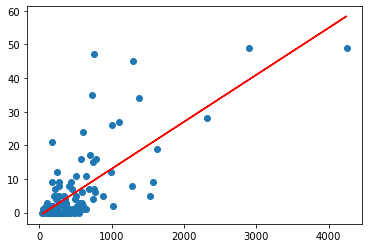

In [210]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [211]:
# kita isi berapa jumlah likesnya, output nya perkiraan jumlah komen
x = [[256]]
tes = lr.predict(x)
print(tes)

[[2.63115542]]


salah satu alternatif untuk mengisi null values pada kolom 'post_type' adalah dengan mengisi mode / kategori mayoritas dari kolom 'post_type'. mayoritas merupakan 'GraphSidecar'

In [212]:
# df["post_type"].fillna(df["post_type"].mode()[0], inplace = True)

salah satu alternatif

## Handling unrecognize data type cases

In [213]:
df.head()

date       user_id  total_likes  total_comments  \
0 2022-05-31 06:17:09  lingkaran.co          268               5   
1 2022-05-26 04:21:54  lingkaran.co          170               2   
2 2022-05-12 09:29:43  lingkaran.co          998              12   
3 2022-04-07 10:55:38  lingkaran.co          256               5   
4 2022-03-20 09:45:12  lingkaran.co         1377              34   

      post_type                                            caption  
0  GraphSidecar  Pilih mau yang CTA atau CTV bisa disesuaikan s...  
1  GraphSidecar  Nge-blog tuh emang harus diobok-obok terus bia...  
2  GraphSidecar  Setiap socmed specialist (dan role serupa) ke ...  
3  GraphSidecar  Niche\r\n\ ˈnich  also ˈnēsh or ˈnish \\r\n\r\...  
4        single  Ga ada yang nanya sih, tapi kira-kira kalau ad...

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            152 non-null    datetime64[ns]
 1   user_id         152 non-null    object        
 2   total_likes     152 non-null    int64         
 3   total_comments  152 non-null    int64         
 4   post_type       152 non-null    object        
 5   caption         152 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.2+ KB


salah satu alternatif apabila terdapat data yang tidak sesuai dengan datatype kolomnya, akan dilakukan drop dan di isi dengan value yang sudah ditentukan diatas. menggunakan to_numeric(),contoh:

In [215]:
date_list = ['2020-01-03', '2020-02-03','2019-12-12','2019-11-14','2020-01-02','2020-02-03']
category_list = ['XZ',1,3,'PT','LM',4]

In [216]:
tes = pd.DataFrame({'Date':date_list, 'Category':category_list})
tes

Date Category
0  2020-01-03       XZ
1  2020-02-03        1
2  2019-12-12        3
3  2019-11-14       PT
4  2020-01-02       LM
5  2020-02-03        4

In [217]:
tes['Category'] = pd.to_numeric(tes['Category'], errors='coerce')

In [219]:
tes

Date  Category
0  2020-01-03       NaN
1  2020-02-03       1.0
2  2019-12-12       3.0
3  2019-11-14       NaN
4  2020-01-02       NaN
5  2020-02-03       4.0